### Eigendecomposition


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np
from sclibrary import read_csv, get_coordinates
from sclibrary import SCPlot


data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = read_csv(filename=filename, delimeter=delimeter, src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)
sc = G.to_simplicial_complex(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# if coordinates exist
filename = data_folder + '/coordinates.csv'
coordinates = get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")

# create a plot
scplot = SCPlot(sc, coordinates)

#### Eigendecomposition

In [3]:
u_h, eigenvals_h = sc.get_eigendecomposition(component="harmonic")
u_c, eigenvals_c = sc.get_eigendecomposition(component="curl")
u_g, eigenvals_g = sc.get_eigendecomposition(component="gradient")

In [4]:
print("Eigenvalues:", eigenvals_h)
u_h

Eigenvalues: [0.]


array([[ 0.06889728],
       [ 0.13779457],
       [-0.20669185],
       [ 0.06889728],
       [-0.34448642],
       [ 0.55117828],
       [-0.55117828],
       [-0.36745217],
       [-0.18372609],
       [ 0.18372609]])

In [5]:
print("Eigenvalues:", eigenvals_c)
u_c

Eigenvalues: [2. 3. 4.]


array([[ 5.00000000e-01,  0.00000000e+00, -3.53553385e-01],
       [-1.50107407e-16,  0.00000000e+00,  7.07106769e-01],
       [-5.00000000e-01,  0.00000000e+00, -3.53553385e-01],
       [ 5.00000000e-01,  0.00000000e+00, -3.53553385e-01],
       [ 5.00000000e-01,  0.00000000e+00,  3.53553385e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -5.77350259e-01,  0.00000000e+00],
       [ 0.00000000e+00,  5.77350259e-01,  0.00000000e+00],
       [ 0.00000000e+00, -5.77350259e-01,  0.00000000e+00]])

In [6]:
print("Eigenvalues:", eigenvals_g)
u_g

Eigenvalues: [0.81434923 2.32800913 3.31390762 3.59808946 4.45752954 5.48811531]


array([[ 0.13607138,  0.48619685, -0.09433983, -0.46687335, -0.36745653,
        -0.05878212],
       [-0.1854457 ,  0.0652547 , -0.31280029, -0.10648241, -0.47395313,
         0.32946974],
       [-0.29740456, -0.32671991, -0.02961399, -0.279232  , -0.53557879,
        -0.1462567 ],
       [-0.32151708, -0.42094216, -0.21846044,  0.36039096, -0.10649659,
         0.38825187],
       [-0.11195885, -0.3919746 ,  0.28318629, -0.17274958, -0.06162565,
        -0.47572643],
       [-0.59076518,  0.10910526, -0.21460989, -0.04279641,  0.2168476 ,
        -0.49028891],
       [-0.51395106,  0.26664403, -0.08504377, -0.29986769,  0.41316539,
         0.30512139],
       [ 0.03514474,  0.23443583, -0.41275239,  0.42982084, -0.13469216,
        -0.31968388],
       [-0.23514785,  0.39679703,  0.27091977,  0.50137603, -0.28346965,
        -0.12263153],
       [-0.27029258,  0.16236119,  0.68367219,  0.07155522, -0.14877748,
         0.19705234]])

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


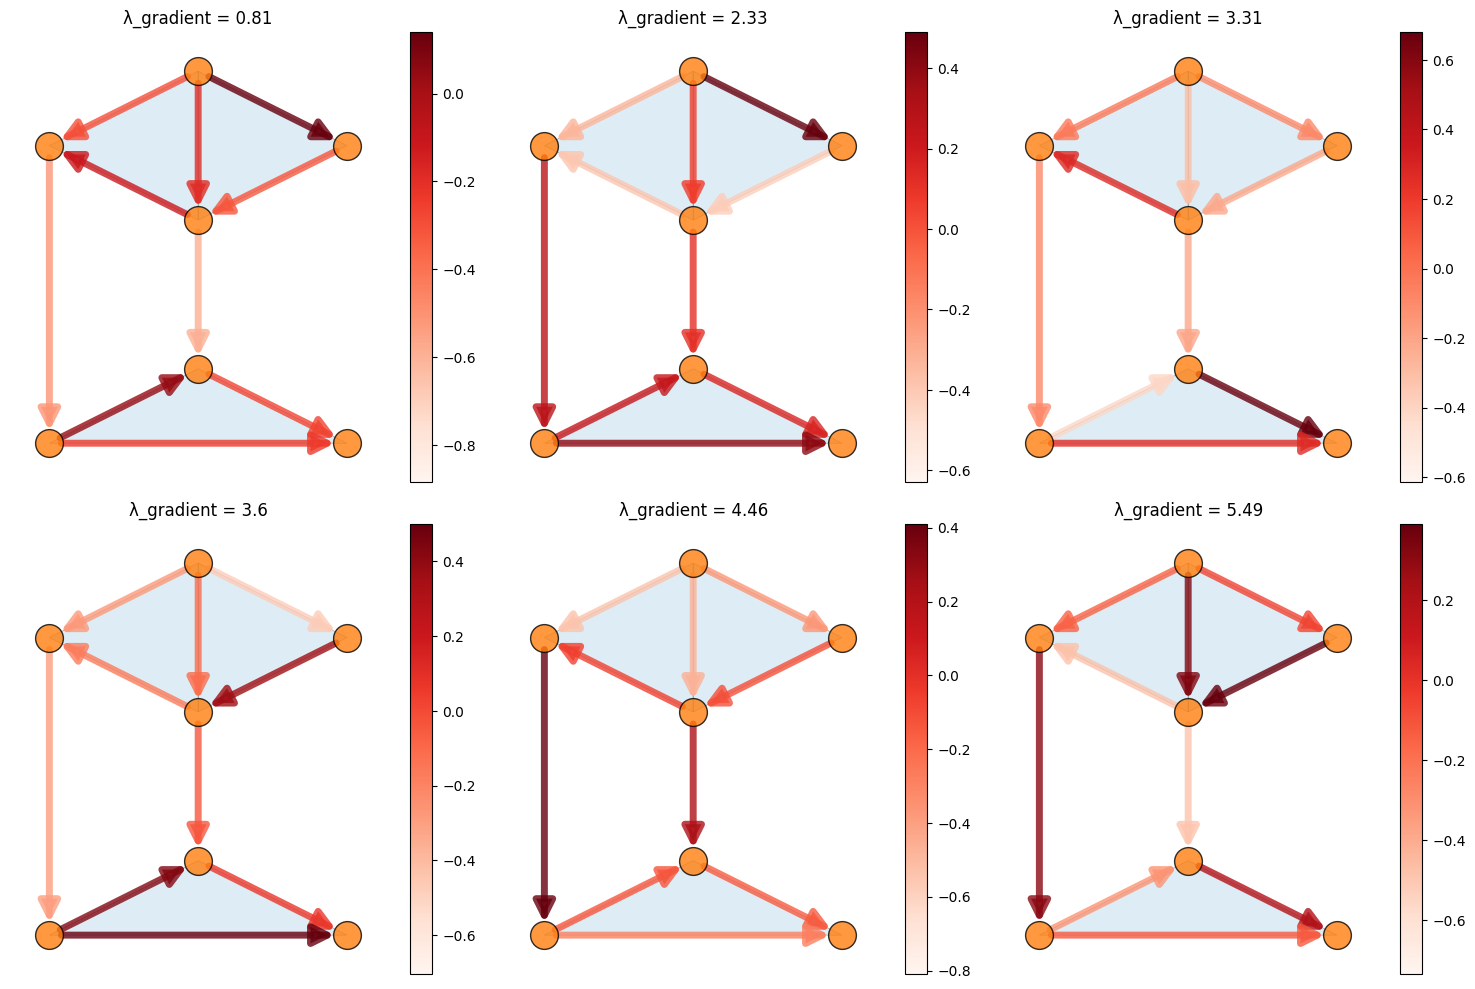

In [7]:
# plot without labels
scplot.draw_eigenvectors(component="gradient", with_labels=False)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


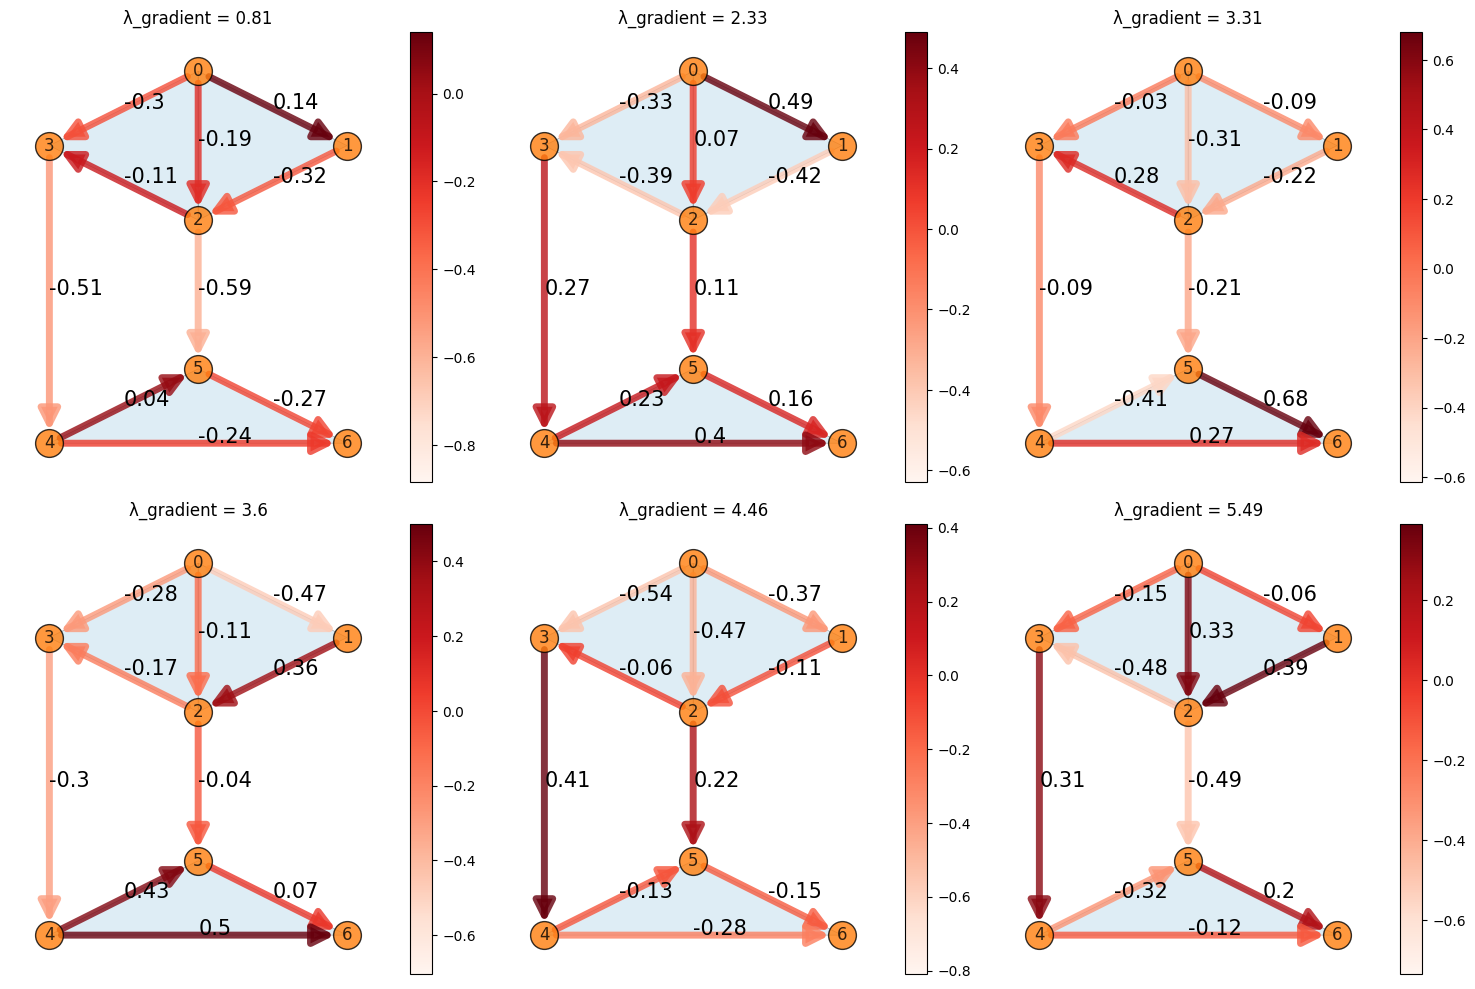

In [8]:
# plot all the gradient eigenvectors
scplot.draw_eigenvectors(component="gradient")

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


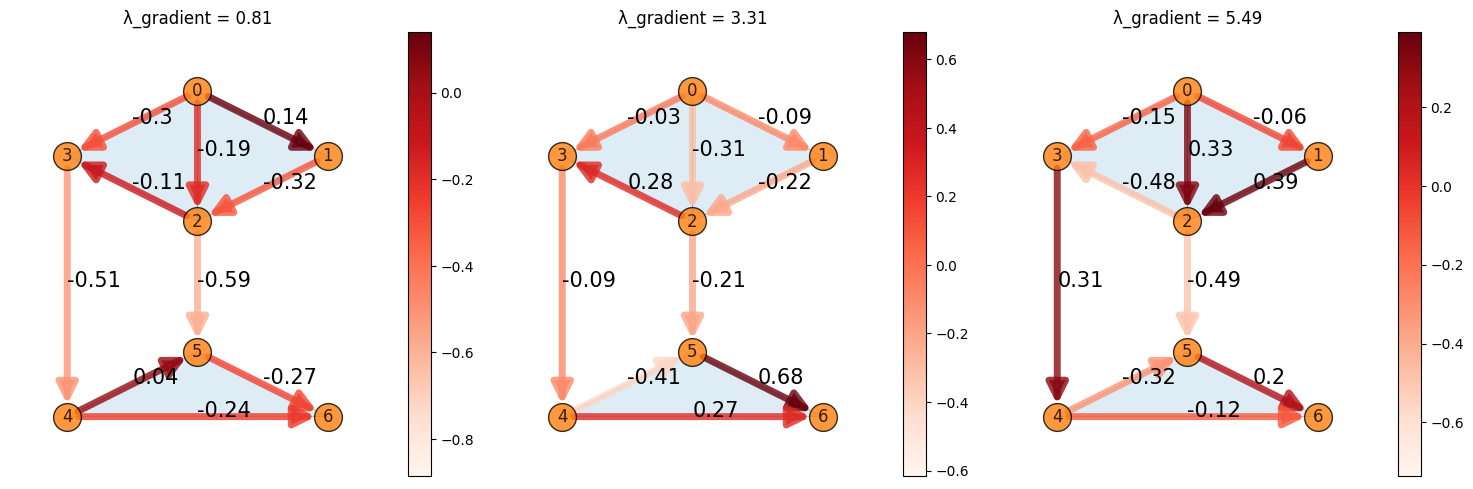

In [9]:
# plot only the selected gradient eigenvectors
eig_vec_indices = np.array([0, 2, 5])
scplot.draw_eigenvectors(component="gradient", eigenvector_indices=eig_vec_indices)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


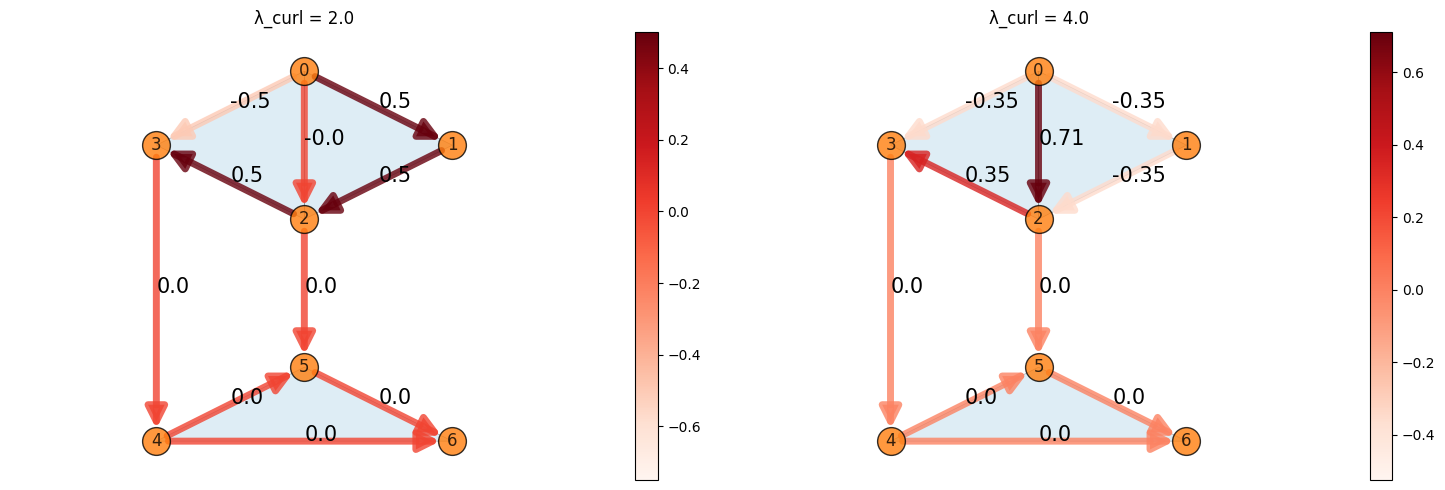

In [10]:
# plot only the selected curl eigenvectors
eig_vec_indices = np.array([0, 2])
scplot.draw_eigenvectors(component="curl", eigenvector_indices=eig_vec_indices)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


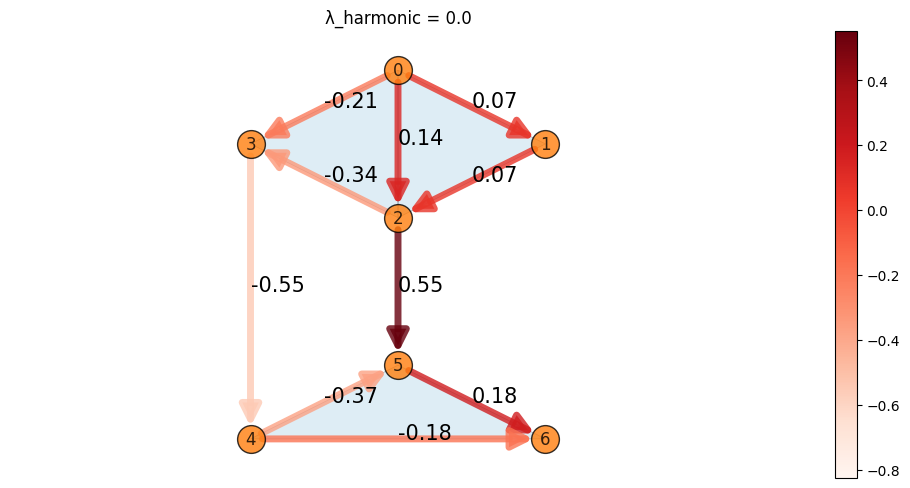

In [11]:
# plot harmonic eigenvectors
scplot.draw_eigenvectors(component="harmonic", figsize=(10, 5))